# Homework 1: Mean Sea Level Time Series Analysis for Mumbai (India)
### Author: Javed Ali
*Date: 09 September 2020*

In [1]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline

import seaborn as sns
import plotly
from plotly import graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels

import scipy.stats as st
import scipy.io as sio

from datetime import datetime

# a.) Calculate the linear trend (in $mm/year$) and 99% confidence interval for the entire data record

In [2]:
# Load the time series data
data = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0, 
                               index_col=[0],
                               parse_dates=[0])

In [3]:
# Convert the sea level data from mm/month to mm/year
data['sea_level'] = data['sea_level']*12

In [4]:
t = data.index.values #time
s = data['sea_level'] #sea level
L = len(data)

In [5]:
# Check the time series data
data.head()

sea_level
time                
1878.0416      82704
1878.1250      83688
1878.2084      83688
1878.2916      83976
1878.3750      84240

In [6]:
# Summary of the data
data.describe(percentiles=[0.99, 0.25, 0.50, 0.75, 0.90])

sea_level
count   1392.000000
mean   84159.500000
std      762.073348
min    81972.000000
25%    83652.000000
50%    84192.000000
75%    84672.000000
90%    85116.000000
99%    85920.000000
max    86592.000000

### Plotting the original time series data

In [7]:
# Plot the original time series data

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index.values, 
    y=data.sea_level, 
    line_color='deepskyblue'))

fig.update_layout(
    template = "plotly_white",
    title_text="Original Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time (years)")
fig.update_yaxes(title_text="Mean Sea Level (mm/year)")

plotly.offline.plot(fig, filename='Original MSL TS.html')

fig.show()

In [8]:
# Create a matrix with the time information (t is years)
matrix = (t, np.ones((L,1)))

# Build a model based on y = ax + b + Error
t_mean= np.mean(t)
s_mean= np.mean(s)

In [9]:
t_mean, s_mean

(1936.0, 84159.5)

### METHOD 1: Linear regression fit using `Numpy's polynomial fit` function

The linear parameters are, a = 8.14841867027081 b = 68384.16145435575


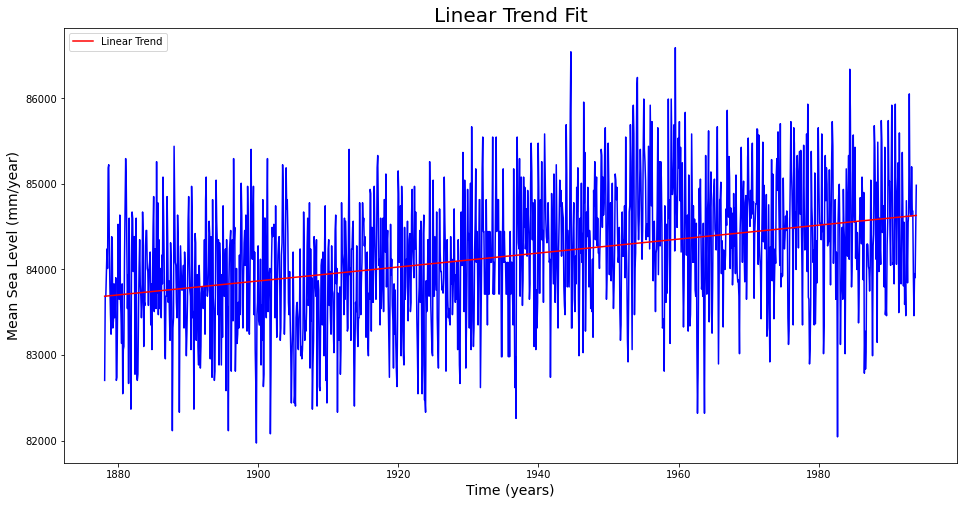

In [10]:
# Numpy's polynomial fit function
parameters = np.polyfit(data.index.values, data['sea_level'], deg = 1) #Linear trend is a polynomial of degree 1
(a,b) = parameters
trend = a*data.index.values + b
print('The linear parameters are, a =', a, 'b =', b)

fig = plt.figure(figsize=(16,8))
plt.plot(data.index.values, data['sea_level'], color='blue')
plt.plot(data.index.values, trend, label='Linear Trend', color ='red')
plt.legend(loc='upper left')

plt.xlabel("Time (years)", fontsize=14)
plt.ylabel("Mean Sea Level (mm/year)", fontsize=14)
plt.title("Linear Trend Fit", fontsize=20)
plt.savefig('2 Linear trend fit', dpi=300)
plt.show()

In [11]:
print(trend)

[83687.23069134 83687.91026946 83688.58984758 ... 84630.41015242
 84631.08973054 84631.76930866]


### METHOD 2: Least Squares trend fit using `Numpy`

Least Squares parameters are, m = 8.148418670270813 c = 68384.16145435568


Text(0.5, 1.0, 'Least Squares Trend Fit')

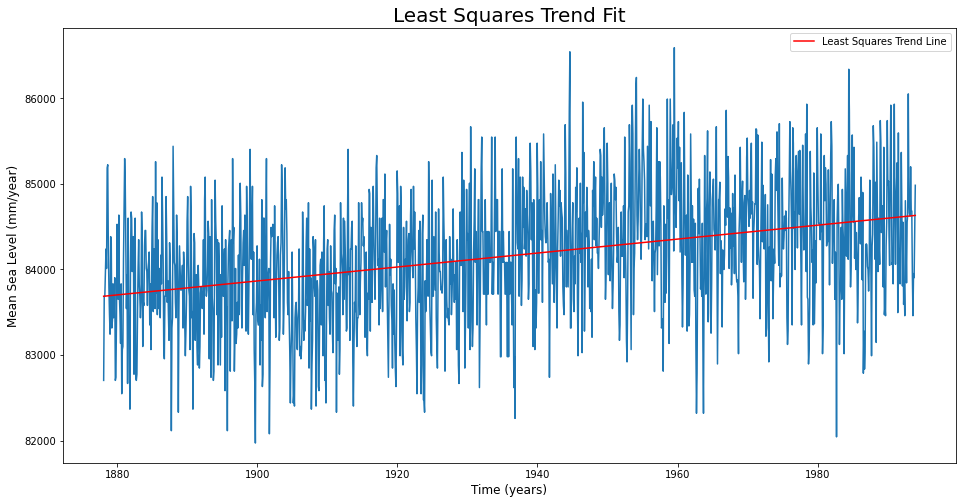

In [12]:
# METHOD 2: Least Squares trend

#Rewrite the line equation as y = Ap, where A = [[x 1]] and p = [[m], [c]]

A = np.vstack([data.index.values, np.ones(L)]).T
m,c = np.linalg.lstsq(A,data['sea_level'], rcond=None)[0]
print('Least Squares parameters are, m =', m, 'c =', c)

line = m*data.index.values+c

fig = plt.figure(figsize=(16,8))
plt.plot(data.index.values, data['sea_level'])
plt.plot(data.index.values, line, label='Least Squares Trend Line', color='red')
plt.legend(loc='best')

plt.xlabel("Time (years)", fontsize=12)
plt.ylabel("Mean Sea Level (mm/year)", fontsize=12)
plt.title("Least Squares Trend Fit", fontsize=20)

In [13]:
print(line)

[83687.23069134 83687.91026946 83688.58984758 ... 84630.41015242
 84631.08973054 84631.76930866]


### METHOD 3: Ordinary Least Square (OLS) trend fit using `plotly`

In [101]:
# Method 2.1: OLS trend fit

fig = px.scatter(data, x=data.index.values, y=data["sea_level"], trendline="ols", trendline_color_override='red', 
                 labels={"x": "Time (years)",  "sea_level": "Mean Sea Level (mm/year)"})

fig.update_layout(title='Ordinary Least Square (OLS) Trend Fit')

plotly.offline.plot(fig, filename='6 OLS linear trend fit.html')

fig.show()

In [15]:
# Check the results of OLS trend fit
results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sat, 26 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        17:51:16   Log-Likelihood:                -11116.
No. Observations:                1392   AIC:                         2.224e+04
Df Residuals:                    1390   BIC:                         2.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.838e+04   1103.118     61.992      0.000    6.62e+04    7.05e+04
x1             8.1484      0.570     14.303      0.000       7.031       9.266
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### METHOD 4: Ordinary Least Squares (OLS) linear regression trend fit using `statsmodels`

In [16]:
# Ordinary Least Squares (OLS) linear regression model 

Y = data['sea_level']
X = data.index.values
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sea_level   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sat, 26 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        17:51:17   Log-Likelihood:                -11116.
No. Observations:                1392   AIC:                         2.224e+04
Df Residuals:                    1390   BIC:                         2.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.838e+04   1103.118     61.992      0.000    6.62e+04    7.05e+04
x1             8.1484      0.570     14.303      0.000       7.031       9.266
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Calculate confidence intervals (CI)

In [17]:
# define response variable
y = data['sea_level']

#define predictor variables
x = data.index.values

# add constant to predictor variables
x = sm.add_constant(x)

# fit OLS linear regression model
model = sm.OLS(y, x).fit()

# view model summary
print(model.summary())

print('\n')
# Calculate 99% confidence interval
CI99 = model.conf_int(0.01)
print(CI99)
print('\n')

ci_99 = np.min(CI99)[1] - a
print("The 99% confidence interval of the trend for the entire time series is +-", ci_99, "mm/year")

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Sat, 26 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        17:51:18   Log-Likelihood:                -11116.
No. Observations:                1392   AIC:                         2.224e+04
Df Residuals:                    1390   BIC:                         2.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.838e+04   1103.118     61.992      0.0

# b. Calculate the acceleration (in $mm/year^2$) for the entire data record (note that acceleration is defined as twice the quadratic coefficient!)

### Quadratic trend using `Numpy's polyfit` function

Quadratic trend is a polynomial of degree 2: $ax^2 + bx + c$

The acceleration of the sea level rise in Mumbai is -0.030924194240724696 mm/year^2
The quadratic parameters are [-1.54620971e-02  6.80176587e+01  1.04480752e+04]


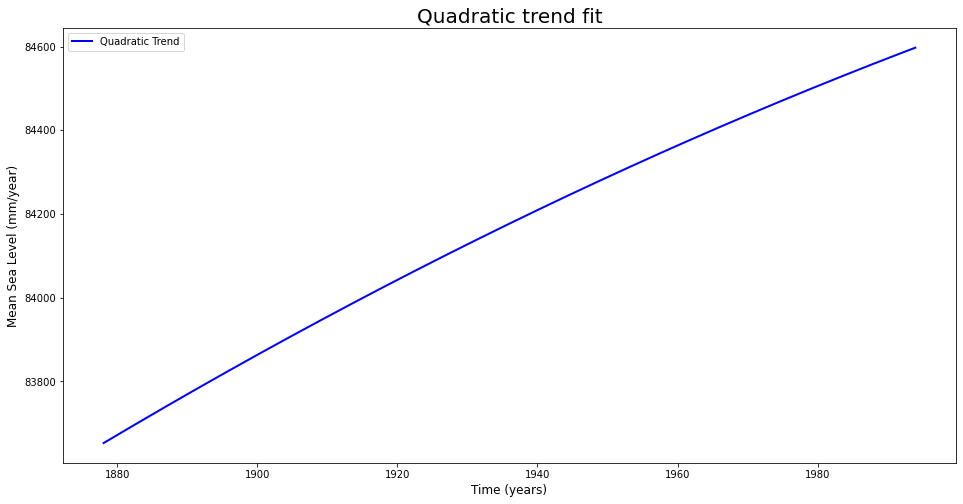

In [100]:
# Quadratic trend 
para_quad = np.polyfit(t,s, deg = 2) 
(aq,bq,cq) = para_quad
acceleration = 2*aq
print('The acceleration of the sea level rise in Mumbai is', acceleration, 'mm/year^2')

quad_trend = aq*(t**2) + bq*t +cq
print('The quadratic parameters are', para_quad)

f = plt.figure(figsize=(16,8))

#plt.plot(data.index.values, data['sea_level'], label='Original', color='grey')

plt.plot(t, quad_trend, label ='Quadratic Trend', color='blue', linewidth=2)
plt.title('Quadratic trend fit', fontsize=20)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Mean Sea Level (mm/year)', fontsize=12)
plt.legend()
plt.savefig('4 Quadratic trend', dpi=300)

plt.show()

The quadratic equation is: 
           2
-0.01546 x + 68.02 x + 1.045e+04


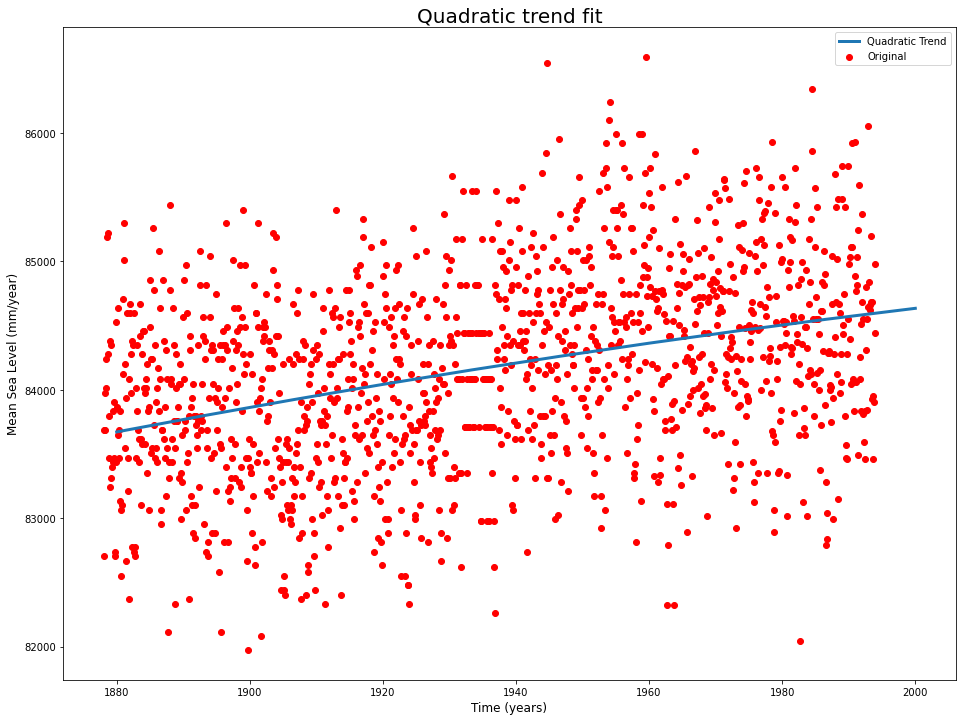

In [19]:
#polynomial fit with degree = 2 (Quadratic fit)
model = np.poly1d(np.polyfit(data.index.values, data["sea_level"], 2))

print('The quadratic equation is: \n', model)

#add fitted polynomial line to scatterplot
f = plt.figure(figsize=(16, 12))
polyline = np.linspace(1880, 2000, 10)
plt.scatter(data.index.values, data["sea_level"], color="red", label='Original')
plt.plot(polyline, model(polyline), label='Quadratic Trend', linewidth=3)

plt.title('Quadratic trend fit', fontsize=20)
plt.xlabel('Time (years)', fontsize=12)
plt.ylabel('Mean Sea Level (mm/year)', fontsize=12)
plt.legend(loc='best')
plt.savefig('5 Quadratic trend with original TS', dpi=300)
plt.show()

# c.) Calculate the linear trends (in $mm/year$) for the first and second halves of the time series

In [20]:
#first half of the time series
data_1 = data.iloc[0:696, 0:1]

In [21]:
t1 = data_1.index.values
s1 = data_1['sea_level']

(a1, b1) = np.polyfit(t1, s1, deg=1)
trend1 = a1*t1 + b1

print('The linear trend from 1878-1935 is', a1, 'mm/year')

The linear trend from 1878-1935 is 3.99584336395457 mm/year


In [23]:
#second half of the time series
data_2 = data.iloc[696:1393, 0:1]

t2 = data_2.index.values
s2 = data_2['sea_level']

(a2, b2) = np.polyfit(t2, s2, deg=1)
trend2 = a2*t2 + b2

print('The linear trend from 1936-1993 is', a2, 'mm/year')

The linear trend from 1936-1993 is 1.7087257914625038 mm/year


In [25]:
# Plot the two halves of the time series data

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data_1.index.values, 
    y=data_1.sea_level, 
    name='TS-1 (1878-1935)',
    line_color='deepskyblue'))

fig.add_trace(go.Scatter(
    x=data_2.index.values, 
    y=data_2.sea_level,
    name='TS-2 (1936-1993)',
    line_color='red'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level for Mumbai (India)",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time (years)")
fig.update_yaxes(title_text="Mean Sea Level (mm/year)")

plotly.offline.plot(fig, filename='Two Halves TS.html')

fig.show()

# d.) Based on the 95% confidence levels determine if the trends derived in (c) are significantly different from each other (i.e. confidence levels do not overlap).

### Trend in TS-1: Confidence interval for TS-1 (1878-1935)

In [26]:
#define response variable
y1 = data_1['sea_level']

#define predictor variables
x1 = data_1.index.values

#add constant to predictor variables
x1 = sm.add_constant(x1)

#fit OLS linear regression model
model1 = sm.OLS(y1, x1).fit()

#view model summary
print(model1.summary())

#95% confidence interval
CI95_1 = model1.conf_int(0.05)
print(CI95_1)

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.716
Date:                Sat, 26 Sep 2020   Prob (F-statistic):            0.00976
Time:                        17:51:28   Log-Likelihood:                -5527.1
No. Observations:                 696   AIC:                         1.106e+04
Df Residuals:                     694   BIC:                         1.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.625e+04   2940.596     25.931      0.0

### Confidence interval for TS-2 (1936-1993)

In [27]:
#define response variable
y2 = data_2['sea_level']

#define predictor variables
x2 = data_2.index.values

#add constant to predictor variables
x2 = sm.add_constant(x2)

#fit OLS linear regression model
model2 = sm.OLS(y2, x2).fit()

#view model summary
print(model2.summary())

#95% confidence interval
CI95_2 = model2.conf_int(0.05)
print(CI95_2)

                            OLS Regression Results                            
Dep. Variable:              sea_level   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.077
Date:                Sat, 26 Sep 2020   Prob (F-statistic):              0.300
Time:                        17:51:30   Log-Likelihood:                -5572.8
No. Observations:                 696   AIC:                         1.115e+04
Df Residuals:                     694   BIC:                         1.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.109e+04   3235.762     25.060      0.0

# e.) Calculate the amplitude (in $cm$) of the average annual cycle for the entire period and identify the month when it peaks (remove the linear trend from (a) for detrending)

In [28]:
# Detrend Time Series Data: remove the linear trend from original time series
detrend = s - trend

In [29]:
detrend.head()

time
1878.0416   -983.230691
1878.1250      0.089731
1878.2084     -0.589848
1878.2916    286.732204
1878.3750    550.052626
Name: sea_level, dtype: float64

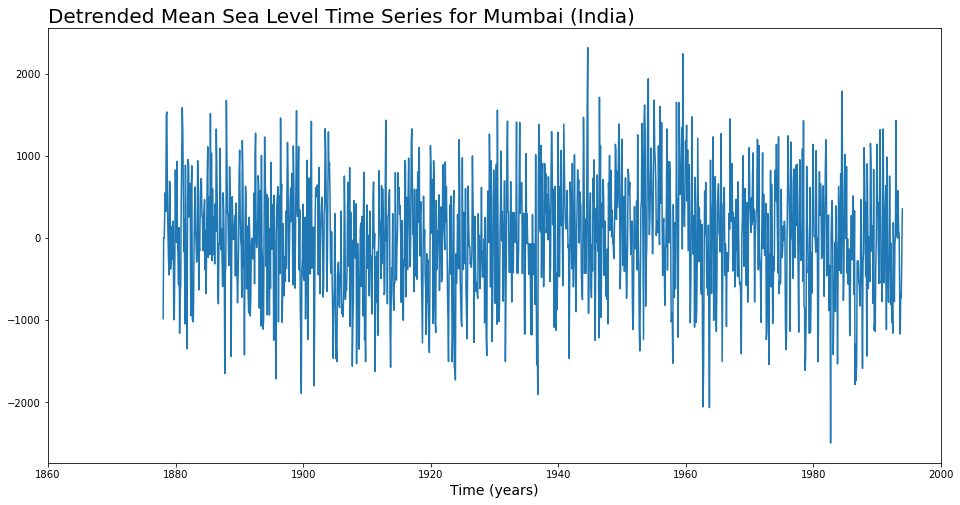

In [30]:
# Plotting detrended time series

f = plt.figure(figsize=(16,8))
detrend.plot()
plt.xlim(1860, 2000)
plt.xlabel('Time (years)', fontsize=14)
plt.title('Detrended Mean Sea Level Time Series for Mumbai (India)', fontsize=20, loc='left')

plt.savefig('7 Detrended TS', dpi=300)

In [31]:
# Create a row for each month (12) and a column for each year
mo = detrend.values.reshape(12, int(L/12)) #float to integer

In [32]:
mo

array([[-9.83230691e+02,  8.97305419e-02, -5.89847575e-01, ...,
         5.48037280e+02,  3.19359331e+02, -2.21320247e+02],
       [-1.64999982e+03, -4.50677773e+02, -3.31357351e+02, ...,
        -2.26730224e+02, -5.27409802e+02,  3.23912249e+02],
       [-3.72767329e+02,  5.38553093e+02,  1.16187514e+03, ...,
        -6.41497728e+02, -4.14177306e+02,  3.53143116e+02],
       ...,
       [ 5.27856884e+02,  6.59177306e+02,  7.04977281e+01, ...,
        -4.24875145e+02,  1.23044691e+03, -6.78232671e+02],
       [-5.22912249e+02, -5.59590198e+02, -5.48269776e+02, ...,
        -3.95642649e+02,  2.87677773e+02,  7.78999825e+02],
       [-4.33679753e+02,  1.78564067e+03,  1.30496272e+03, ...,
        -7.26410152e+02, -1.87089731e+02,  3.52230691e+02]])

In [33]:
mo.shape

(12, 116)

In [34]:
# Seasonal (Annual) Cycle by averaging by months (all the Januaries, Febs, etc.)
cycle = mo.mean(axis=1) #average the rows

In [35]:
cycle

array([ 134.89667778,  -11.83689129,  -77.46701209, -170.51091193,
       -137.24448101,  -45.01253283,  126.8746018 ,  229.34792928,
         91.71780849,   50.29459829,  -62.19759147, -128.86219502])

In [36]:
cycle.shape

(12,)

In [37]:
max(cycle), min(cycle)

(229.3479292810318, -170.51091193492263)

In [38]:
#Calculate the amplitude
amp = (max(cycle)-min(cycle))/2

print('The amplitude of the seasonal cycle is', amp/10, 'cm')
print('On average, the sea level in Mumbai peaks in August at', max(cycle)/10, 'cm')

The amplitude of the seasonal cycle is 19.992942060797724 cm
On average, the sea level in Mumbai peaks in August at 22.93479292810318 cm


In [39]:
max_month0 = np.argmax(cycle, axis=0)

print(max_month0)

7


# f.) Same as (e) but separately for the first 5 years of the record and last 5 years of the record (note: use the same detrended time series as in (e), DO NOT detrend the first/last five years of data again)


In [40]:
# First 5 years
f5cycle = mo[:,0:5].mean(axis=1) # all the rows:(months), first 5 columns (years)
f5amp = (max(f5cycle)-min(f5cycle))/2

print('The amplitude of the average annual cycle from 1878-1882 is', f5amp/10, 'cm')
print('The average sea level during the first 5 years of the record peaks in the month of May at', np.max(f5cycle), 'mm.')

The amplitude of the average annual cycle from 1878-1882 is 41.59679928231592 cm
The average sea level during the first 5 years of the record peaks in the month of May at 459.5385070688877 mm.


In [41]:
max_month = np.argmax(f5cycle, axis=0)

print(max_month)

4


In [42]:
# Last 5 years
l5cycle = mo[:,-5:].mean(axis=1) #last 5 columns
l5amp = (max(l5cycle)-min(l5cycle))/2

print('The amplitude of the last 5 years of the sea level record in Mumbai is', l5amp/10, 'cm')
print('The average sea level during the last 5 years of the record peaks in August at', np.max(l5cycle), 'mm.')

The amplitude of the last 5 years of the sea level record in Mumbai is 81.16320071768394 cm
The average sea level during the last 5 years of the record peaks in August at 1105.4614929310278 mm.


In [43]:
max_month2 = np.argmax(l5cycle, axis=0)

print(max_month2)

7


In [44]:
print('First five years: ', f5cycle)
print('\n')
print('Last five years: ', l5cycle)

First five years:  [ -29.3891957    50.24264851  369.87449272  -25.69333714  459.53850707
  212.77035128 -372.39747858 -364.76563437  326.86620984  221.69837998
 -202.66977581  378.5620684 ]


Last five years:  [ -47.1620684  -346.73022419 -394.29837998  280.53379016 -136.63436563
 -517.80252142  325.02964872 1105.46149293 -283.70666286  124.72550728
  283.55735149 -481.6108043 ]


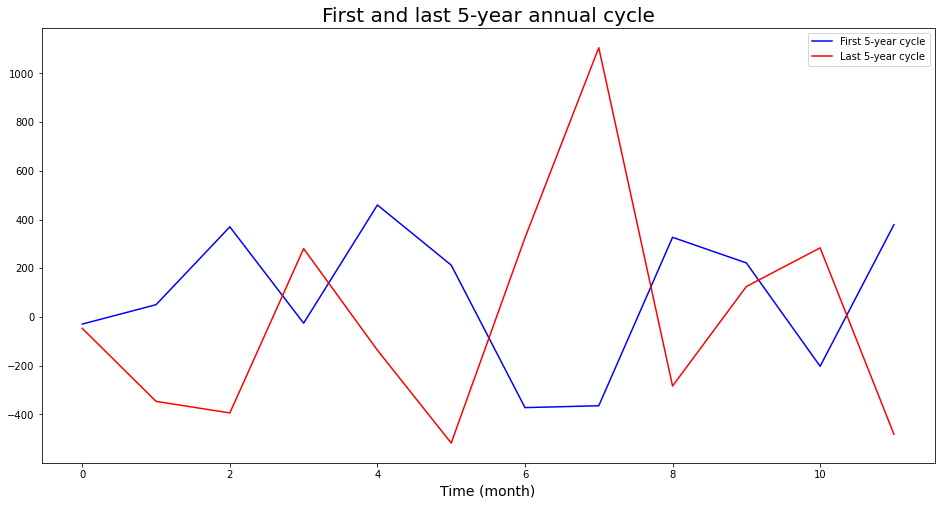

In [99]:
f = plt.figure(figsize=(16,8))

plt.plot(f5cycle, color='blue', label='First 5-year cycle')
plt.plot(l5cycle, color='red', label='Last 5-year cycle')

plt.legend(loc='best')
plt.title('First and last 5-year annual cycle', fontsize=20)
plt.xlabel('Time (month)', fontsize=14)
plt.savefig('8 first & last 5-year cycle', dpi=300)

# g.) Identify the largest (positive or negative) monthly anomaly above or below the average seasonal cycle (Note: create a time series of the average seasonal cycle and subtract it from the raw data with linear trend removed)

In [46]:
# repeat the annual cycle for the entire record (to match the dimensions of t years)
# 116 years of data, so repeat seasonal cycle 116 times
rep_cycle = np.tile(cycle, int(L/len(cycle)))

In [47]:
rep_cycle

array([ 134.89667778,  -11.83689129,  -77.46701209, ...,   50.29459829,
        -62.19759147, -128.86219502])

In [48]:
rep_cycle.shape

(1392,)

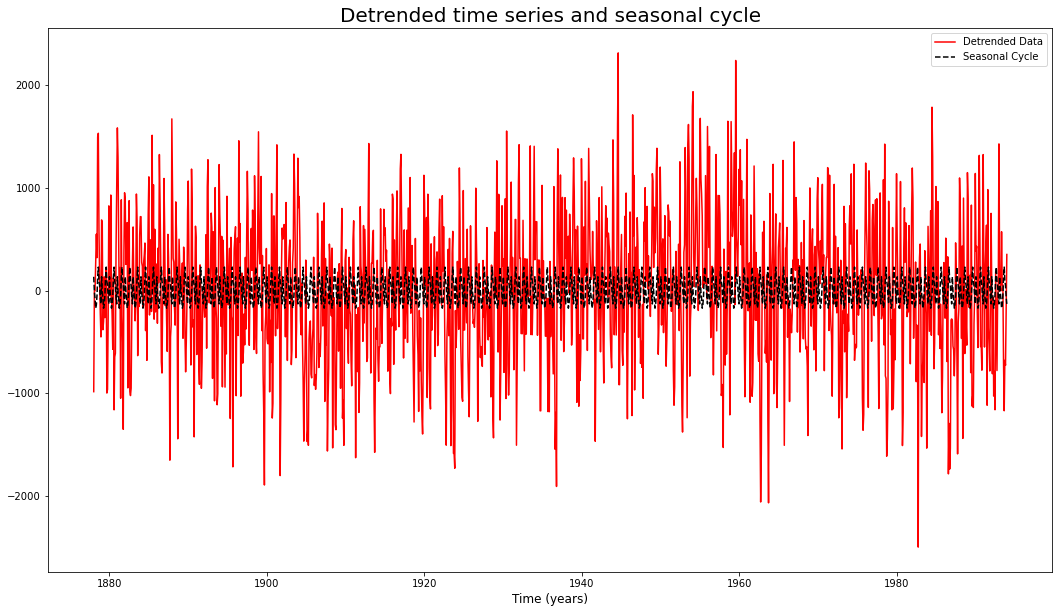

In [49]:
fig=plt.figure(figsize=(18,10))

plt.plot(t, detrend,color='red', label='Detrended Data')
plt.plot(t, rep_cycle,'--',color='black', label='Seasonal Cycle')

plt.xlabel("Time (years)", fontsize=12)

plt.legend()
plt.title('Detrended time series and seasonal cycle', fontsize=20)
plt.savefig('9 Detrended & seasonal cycle', dpi=300)

plt.show()

In [50]:
# Time Series of Average Sea Level Annual Cycle
anomaly = detrend - rep_cycle

In [51]:
anomaly

time
1878.0416   -1118.127369
1878.1250      11.926622
1878.2084      76.877165
1878.2916     457.243116
1878.3750     687.297107
                ...     
1993.6250   -1398.400555
1993.7084    -769.450012
1993.7916    -776.704751
1993.8750    -124.892139
1993.9584     481.092886
Name: sea_level, Length: 1392, dtype: float64

In [52]:
anomaly.shape

(1392,)

In [53]:
anom_max = max(anomaly)
anom_min = min(anomaly)

print(anom_min, anom_max)

-2587.81740710508 2113.7985852322677


In [54]:
# Find index of the minimum value
np.argmin(anomaly)

1256

In [55]:
# Year of minimum value
t[np.argmin(anomaly)]

1982.7084

In [56]:
print('The largest monthly anomaly is', min(anomaly)/10, 'cm, which occurs in September of 1982.')

The largest monthly anomaly is -258.78174071050796 cm, which occurs in September of 1982.


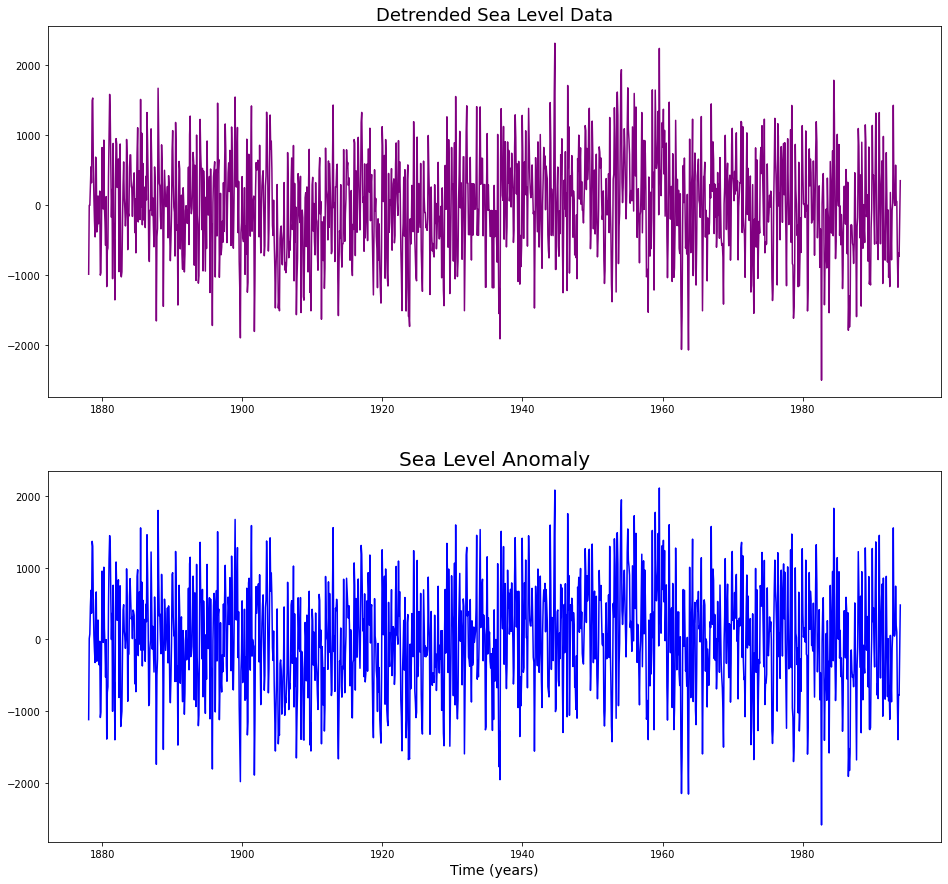

In [57]:
f, (ax1, ax2) = plt.subplots(2, figsize=(16,15))

ax1.plot(t, detrend, color = 'purple')
ax1.set_title('Detrended Sea Level Data', fontsize=18)

ax2.plot(t, anomaly, color = 'blue')
ax2.set_title('Sea Level Anomaly', fontsize=20)

plt.xlabel("Time (years)", fontsize=14)
plt.savefig('10 Detrended and anomaly', dpi=300)
#plt.tight_layout()
plt.show()

In [79]:
# Plot the two halves of the time series data


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=t, 
    y=anomaly, 
    name='Sea Level Anomaly'))

fig.update_layout(
    template = "plotly_white",
    title_text="Monthly Anomaly",
    xaxis_rangeslider_visible=True)

fig.update_layout(xaxis=dict(range=[1875,2000]))

fig.update_xaxes(title_text="Time (years)")
#fig.update_yaxes(title_text="Mean Sea Level (mm/year)")

plotly.offline.plot(fig, filename='11 Monthly anomaly.html')

fig.show()

# h.) Calculate the range of decadal variability (defined as difference between max and min value after applying an 8-year moving average to the raw data with the linear trend removed; note that raw data is given at monthly resolution)


### Apply 8-year moving average on detrended time series data and calculate the range of decadal variability

Create a function for applying 8-year moving average, calculating range of decadal variability and plotting the results

In [84]:
def moving_avg(TS):
    
    # Calculate moving average
    rolmean = TS.rolling(window = 96, center = False).mean()  # 96 months = 8 years
    rol_mean = rolmean.dropna()
    max_rol = max(rol_mean)
    min_rol = min(rol_mean)
    dec_var = max_rol - min_rol
    #print(rol_mean)
    print('The range of the decadel variability is:', dec_var, 'mm')
     
    
    #Plot moving average:
    fig = plt.figure(figsize=(15,8))
    orig = plt.plot(TS, color='blue',label='Detreded TS')
    mean = plt.plot(rolmean, color='red', label='8-Year Moving Average')
    plt.legend(loc='best')
    plt.title('Detrended Time Series with 8-Year Moving Average', fontsize=20) 
    plt.xlabel('Time (years)', fontsize=16)
    plt.ylabel('Mean Sea Level (mm/year)', fontsize=16)
    plt.tick_params(labelsize=12);
    #plt.savefig('12 Detrended TS with 8-year moving average', dpi=300)
    plt.show(block=False)

The range of the decadel variability is: 785.1395898242979 mm


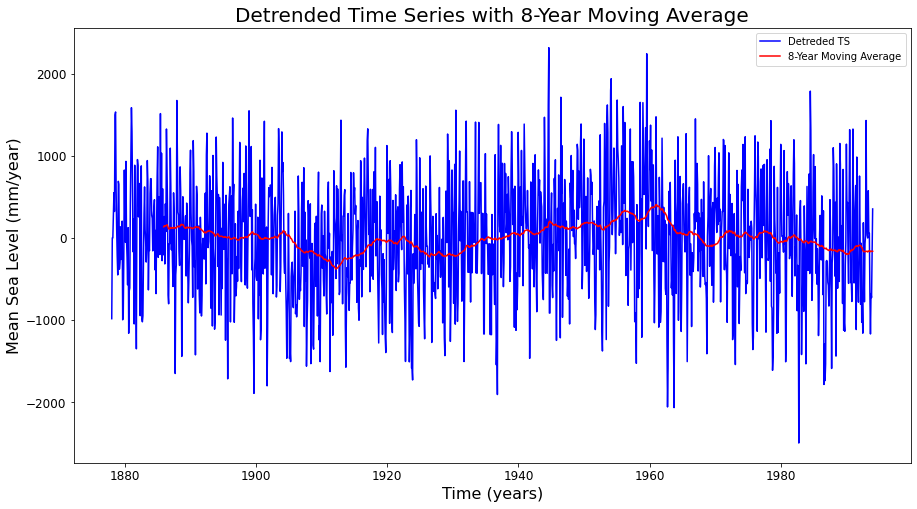

In [83]:
moving_avg(detrend)

# Decompose the time series

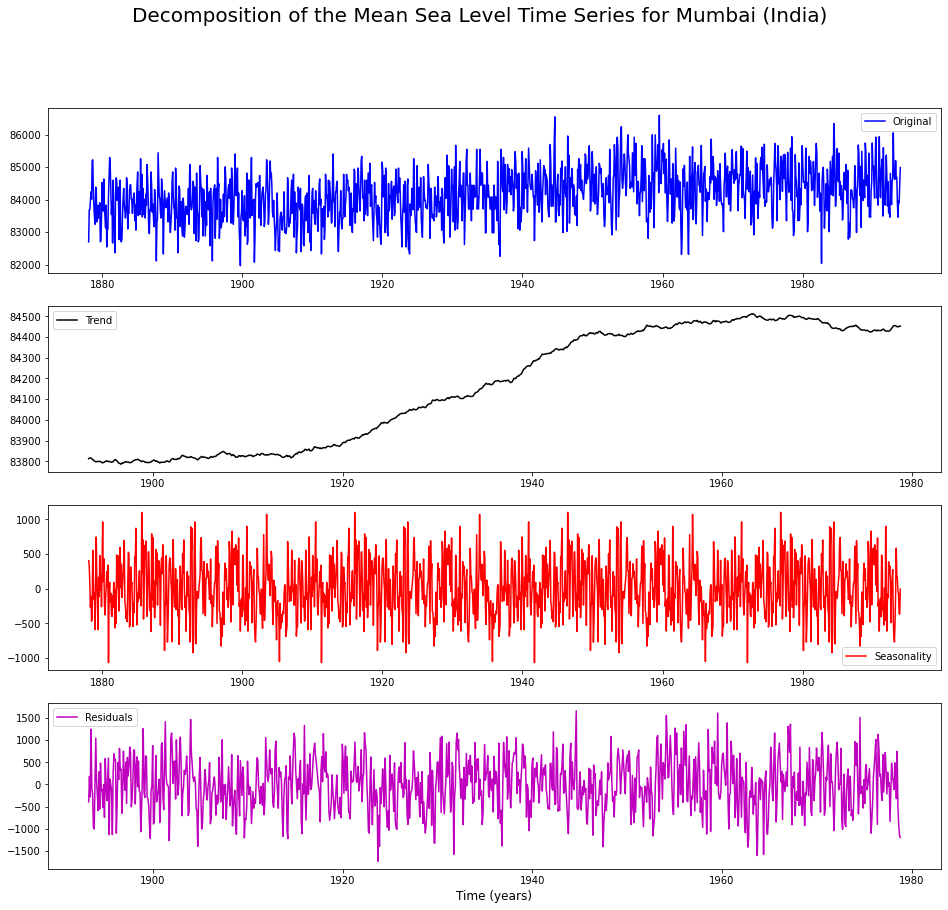

In [85]:
result = seasonal_decompose(data['sea_level'], model='additive', period=365) 

trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot gathered statistics
#plt.rcParams['figure.figsize'] = (16, 9)
f = plt.figure(figsize=(16,14))

plt.suptitle("Decomposition of the Mean Sea Level Time Series for Mumbai (India)", fontsize=20)

plt.subplot(411)
plt.plot(data, label='Original', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend', color="black")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="red")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals', color="m")
plt.legend(loc='best')

plt.xlabel("Time (years)", fontsize=12)

plt.savefig('13 Decomposition of original TS', dpi=300)

#plt.tight_layout()


### Decomposition of detrended time series

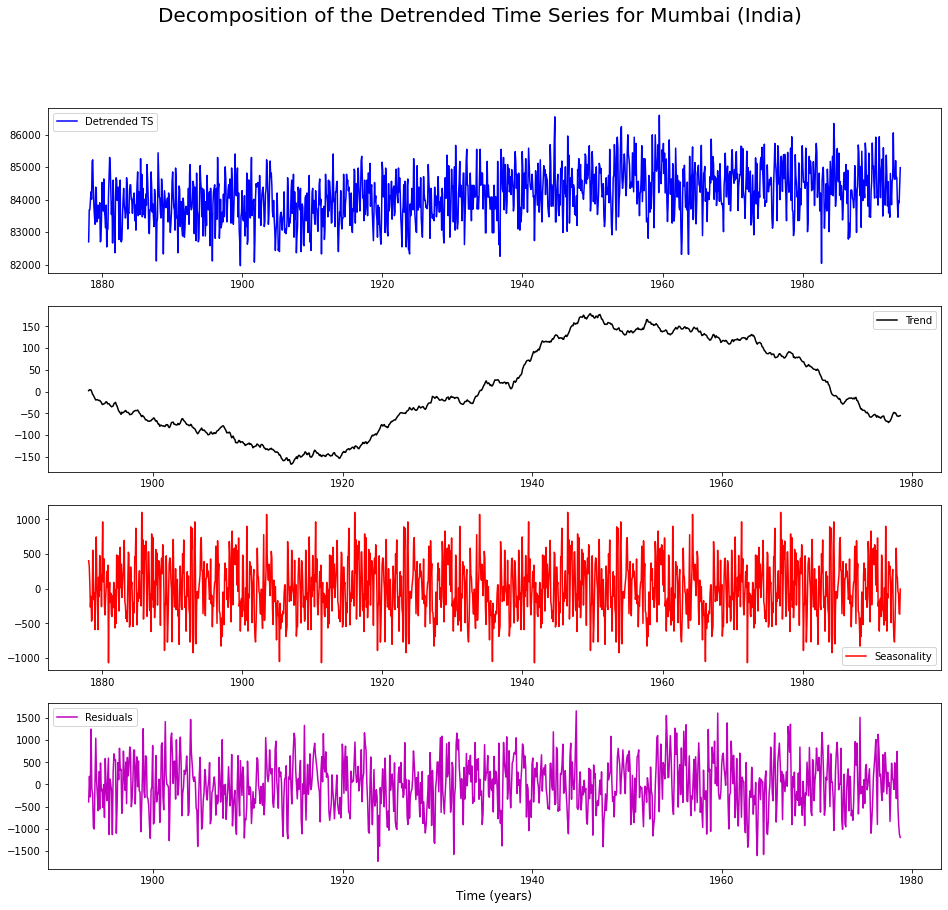

In [88]:
result2 = seasonal_decompose(detrend, model='additive', period=365) 

trend2 = result2.trend
seasonal2 = result2.seasonal
residual2 = result2.resid

# Plot gathered statistics
#plt.rcParams['figure.figsize'] = (16, 10)
f = plt.figure(figsize=(16,14))

plt.suptitle("Decomposition of the Detrended Time Series for Mumbai (India)", fontsize=20)

plt.subplot(411)
plt.plot(data, label='Detrended TS', color='blue')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend2, label='Trend', color="black")
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal2,label='Seasonality', color="red")
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual2, label='Residuals', color="m")
plt.legend(loc='best')

plt.xlabel("Time (years)", fontsize=12)

plt.savefig('14 Decomposition of detrended TS', dpi=300)

#plt.tight_layout()


# i.) Produce a plot of the raw data with linear trend and quadratic trend in the same panel

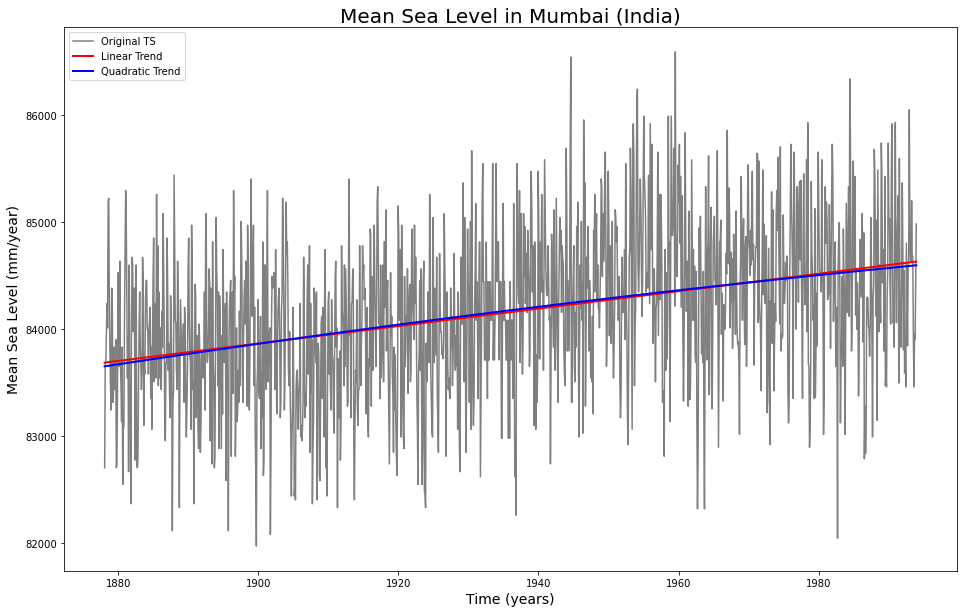

In [94]:
# Linear trend
parameters = np.polyfit(data.index.values, data['sea_level'], deg = 1) 
(a,b) = parameters
trend = a*data.index.values + b


# Quadratic trend 
para_quad = np.polyfit(t,s, deg = 2) 
(aq,bq,cq) = para_quad
acceleration = 2*aq
quad_trend = aq*(t**2) + bq*t +cq


# Plot linear and quadratic trends
f = plt.figure(figsize=(16,10))

plt.plot(data.index.values, data['sea_level'], color='grey', label='Original TS')
plt.plot(data.index.values, trend, label='Linear Trend', color ='red', linewidth=2)

plt.plot(t, quad_trend, label ='Quadratic Trend', color='blue', linewidth=2)

plt.title('Mean Sea Level in Mumbai (India)', fontsize=20)
plt.xlabel("Time (years)", fontsize=14)
plt.ylabel("Mean Sea Level (mm/year)", fontsize=14)
plt.legend(loc='best')

plt.savefig('16 Linear & Quadratic trends with Original TS', dpi=300)

plt.show()

# j.) Produce a plot with the de-trended raw data (i.e. linear trend removed) and 8-year moving average in the same panel

The range of the decadel variability is: 785.1395898242979 mm


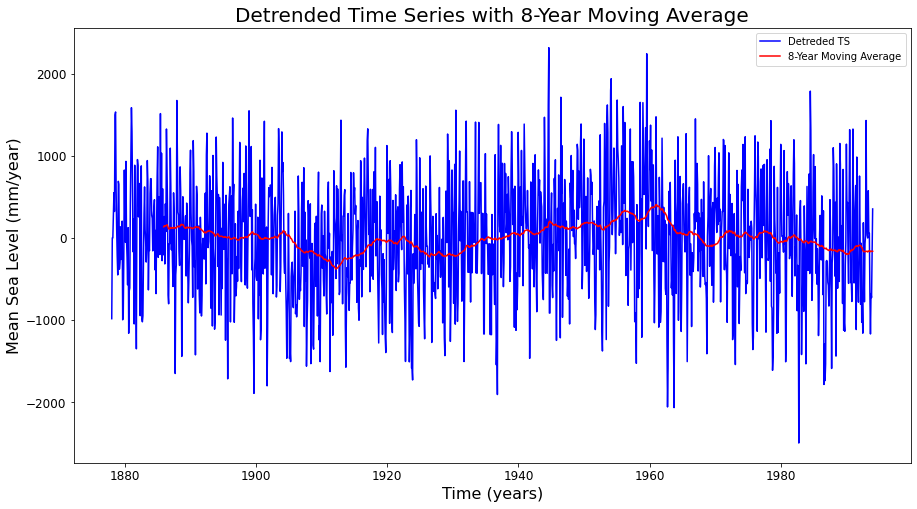

In [92]:
moving_avg(detrend)